# 데이터 불러오기

In [1]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # 그래프를 더 높은 해상도로 출력
%matplotlib inline

In [2]:
#한글 폰트 깨짐 방지
import warnings
warnings.filterwarnings(action='ignore')

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [3]:
df = pd.read_csv('./wildfireDataset.csv')
df.head()

,일련번호,인명피해수,재산피해금액,소방서명,서센터명,소방지역대명,화재발생일자,화재발생시간,접수일자,접수시각,...,발화원인,발화요인대분류명,전체인력수합계,동원장비수,날씨,온도,습도,시간단위풍속,시간단위풍향,특보내용
0,1,0,0,강릉소방서,경포119안전센터,NaN,20110122,233500,20110122,233511,...,기타,방화의심,37,8,맑음,-1.0,30,45.0,8.0,NaN
1,2,0,184330,양양소방서,하조대119안전센터,NaN,20110131,181300,20110131,181311,...,기타,부주의,1872,71,맑음,1.0,10,225.0,8.0,건조경보
2,3,0,0,강릉소방서,경포119안전센터,NaN,20110201,210700,20110201,210710,...,기타,방화의심,184,15,맑음,1.0,550,135.0,4.0,NaN
3,4,0,4864,홍천소방서,서석119안전센터,내촌119지역대,20110211,175000,20110211,175032,...,입산자실화,기타,171,9,구름많음,-2.0,29,225.0,4.0,NaN
4,5,0,50,원주소방서,흥업119안전센터,귀래119지역대,20110212,61800,20110212,61836,...,모닥불,부주의,94,9,구름많음,-6.0,44,225.0,4.0,NaN


In [4]:
df.dtypes

일련번호           int64
인명피해수          int64
재산피해금액         int64
소방서명          object
서센터명          object
소방지역대명        object
화재발생일자         int64
화재발생시간         int64
접수일자           int64
접수시각           int64
출동일자           int64
출동시각           int64
현장도착일자         int64
현장도착시각         int64
초진일자           int64
초진시각           int64
완진일자           int64
완진시간           int64
출동소요시간         int64
화재진압시간         int64
현장소방서거리        int64
현장안전센터거리       int64
현장소방지역대거리    float64
시군구명          object
읍면동명          object
시설장소소분류명      object
화재유형명         object
발화지점          object
발화원인          object
발화요인대분류명      object
전체인력수합계        int64
동원장비수          int64
날씨            object
온도           float64
습도             int64
시간단위풍속       float64
시간단위풍향       float64
특보내용          object
dtype: object

# 출동시간 전처리 및 가정

가정 1 : 출동시간이 빠르면 화재진압시간이 더 빠를 것이다.<br>
가정 2 : 출동시간이 빠르면 재산피해금액이 더 적을 것이다.<br>
가정 3 : 출동시간이 빠르면 인명피해수가 더 적을 것이다.<br>

=> 분석 결과 출동 시간이 중요한 역할을 한다고 보기엔 어려웠다,,
<br>

15시 59분 52초 => 15*60+59 = 959분 식으로 바꿔서 분석을 진행했다. 
(초 단위를 959.52 이런 식으로 넣으려다가 애매해서 우선 생략했다.)

In [5]:
df['화재진압시간']

0         1800
1       155952
2        12300
3        20500
4        35009
         ...  
1048      4529
1049     43459
1050     15226
1051     12539
1052     12515
Name: 화재진압시간, Length: 1053, dtype: int64

In [6]:
df['화재진압시간'].max()

235419

In [7]:
df['화재진압시간_h'] = df['화재진압시간']//10000
df['화재진압시간_m'] = df['화재진압시간']//100-df['화재진압시간_h']*100
df['화재진압시간(분)'] = df['화재진압시간_h']*60+df['화재진압시간_m']
df

,일련번호,인명피해수,재산피해금액,소방서명,서센터명,소방지역대명,화재발생일자,화재발생시간,접수일자,접수시각,...,동원장비수,날씨,온도,습도,시간단위풍속,시간단위풍향,특보내용,화재진압시간_h,화재진압시간_m,화재진압시간(분)
0,1,0,0,강릉소방서,경포119안전센터,NaN,20110122,233500,20110122,233511,...,8,맑음,-1.0,30,45.0,8.0,NaN,0,18,18
1,2,0,184330,양양소방서,하조대119안전센터,NaN,20110131,181300,20110131,181311,...,71,맑음,1.0,10,225.0,8.0,건조경보,15,59,959
2,3,0,0,강릉소방서,경포119안전센터,NaN,20110201,210700,20110201,210710,...,15,맑음,1.0,550,135.0,4.0,NaN,1,23,83
3,4,0,4864,홍천소방서,서석119안전센터,내촌119지역대,20110211,175000,20110211,175032,...,9,구름많음,-2.0,29,225.0,4.0,NaN,2,5,125
4,5,0,50,원주소방서,흥업119안전센터,귀래119지역대,20110212,61800,20110212,61836,...,9,구름많음,-6.0,44,225.0,4.0,NaN,3,50,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,42,0,0,철원소방서,동송119안전센터,NaN,20210509,174449,20210509,174400,...,13,맑음,18.0,22,270.0,8.0,NaN,0,45,45
1049,43,0,0,태백소방서,화전119안전센터,NaN,20210513,153705,20210513,153700,...,18,맑음,23.0,43,45.0,4.0,NaN,4,34,274
1050,44,0,0,횡성소방서,우천119안전센터,안흥지역대,20210514,115006,20210514,115000,...,18,맑음,24.0,58,0.0,4.0,NaN,1,52,112
1051,45,0,223,강릉소방서,주문진119안전센터,NaN,20210607,151139,20210607,151100,...,11,맑음,25.0,62,225.0,4.0,NaN,1,25,85


In [8]:
df.drop(['일련번호', '화재진압시간','화재진압시간_h', '화재진압시간_m'], axis=1, inplace=True)
df

,인명피해수,재산피해금액,소방서명,서센터명,소방지역대명,화재발생일자,화재발생시간,접수일자,접수시각,출동일자,...,발화요인대분류명,전체인력수합계,동원장비수,날씨,온도,습도,시간단위풍속,시간단위풍향,특보내용,화재진압시간(분)
0,0,0,강릉소방서,경포119안전센터,NaN,20110122,233500,20110122,233511,20110122,...,방화의심,37,8,맑음,-1.0,30,45.0,8.0,NaN,18
1,0,184330,양양소방서,하조대119안전센터,NaN,20110131,181300,20110131,181311,20110131,...,부주의,1872,71,맑음,1.0,10,225.0,8.0,건조경보,959
2,0,0,강릉소방서,경포119안전센터,NaN,20110201,210700,20110201,210710,20110201,...,방화의심,184,15,맑음,1.0,550,135.0,4.0,NaN,83
3,0,4864,홍천소방서,서석119안전센터,내촌119지역대,20110211,175000,20110211,175032,20110211,...,기타,171,9,구름많음,-2.0,29,225.0,4.0,NaN,125
4,0,50,원주소방서,흥업119안전센터,귀래119지역대,20110212,61800,20110212,61836,20110212,...,부주의,94,9,구름많음,-6.0,44,225.0,4.0,NaN,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0,0,철원소방서,동송119안전센터,NaN,20210509,174449,20210509,174400,20210509,...,부주의,67,13,맑음,18.0,22,270.0,8.0,NaN,45
1049,0,0,태백소방서,화전119안전센터,NaN,20210513,153705,20210513,153700,20210513,...,기계적요인,144,18,맑음,23.0,43,45.0,4.0,NaN,274
1050,0,0,횡성소방서,우천119안전센터,안흥지역대,20210514,115006,20210514,115000,20210514,...,전기적요인,131,18,맑음,24.0,58,0.0,4.0,NaN,112
1051,0,223,강릉소방서,주문진119안전센터,NaN,20210607,151139,20210607,151100,20210607,...,부주의,50,11,맑음,25.0,62,225.0,4.0,NaN,85


In [9]:
df['출동소요시간'].max()

5840

In [10]:
df['출동소요시간(분)'] = df['출동소요시간']//100
df.drop('출동소요시간', axis=1, inplace=True)
df

,인명피해수,재산피해금액,소방서명,서센터명,소방지역대명,화재발생일자,화재발생시간,접수일자,접수시각,출동일자,...,전체인력수합계,동원장비수,날씨,온도,습도,시간단위풍속,시간단위풍향,특보내용,화재진압시간(분),출동소요시간(분)
0,0,0,강릉소방서,경포119안전센터,NaN,20110122,233500,20110122,233511,20110122,...,37,8,맑음,-1.0,30,45.0,8.0,NaN,18,17
1,0,184330,양양소방서,하조대119안전센터,NaN,20110131,181300,20110131,181311,20110131,...,1872,71,맑음,1.0,10,225.0,8.0,건조경보,959,16
2,0,0,강릉소방서,경포119안전센터,NaN,20110201,210700,20110201,210710,20110201,...,184,15,맑음,1.0,550,135.0,4.0,NaN,83,6
3,0,4864,홍천소방서,서석119안전센터,내촌119지역대,20110211,175000,20110211,175032,20110211,...,171,9,구름많음,-2.0,29,225.0,4.0,NaN,125,22
4,0,50,원주소방서,흥업119안전센터,귀래119지역대,20110212,61800,20110212,61836,20110212,...,94,9,구름많음,-6.0,44,225.0,4.0,NaN,230,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0,0,철원소방서,동송119안전센터,NaN,20210509,174449,20210509,174400,20210509,...,67,13,맑음,18.0,22,270.0,8.0,NaN,45,3
1049,0,0,태백소방서,화전119안전센터,NaN,20210513,153705,20210513,153700,20210513,...,144,18,맑음,23.0,43,45.0,4.0,NaN,274,21
1050,0,0,횡성소방서,우천119안전센터,안흥지역대,20210514,115006,20210514,115000,20210514,...,131,18,맑음,24.0,58,0.0,4.0,NaN,112,12
1051,0,223,강릉소방서,주문진119안전센터,NaN,20210607,151139,20210607,151100,20210607,...,50,11,맑음,25.0,62,225.0,4.0,NaN,85,13


## 출동시간에 따른 화재진압시간(피해규모)

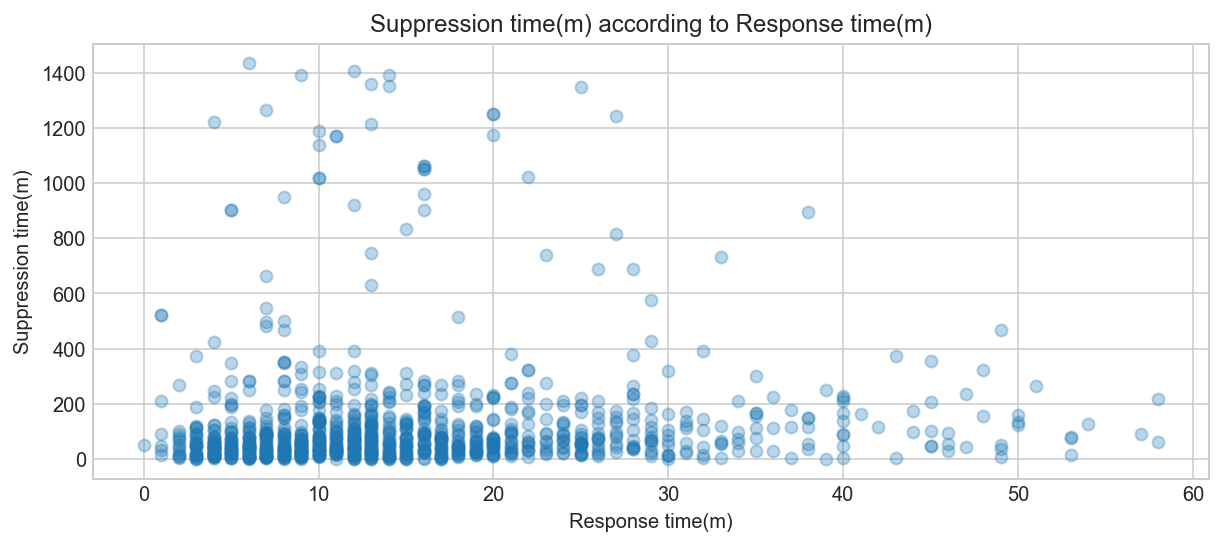

In [11]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.set_title("Suppression time(m) according to Response time(m)")
ax.set_xlabel('Response time(m)')
ax.set_ylabel('Suppression time(m)')
ax.scatter(df['출동소요시간(분)'], df['화재진압시간(분)'], alpha=0.3)
plt.show()

## 출동시간에 따른 재산피해금액

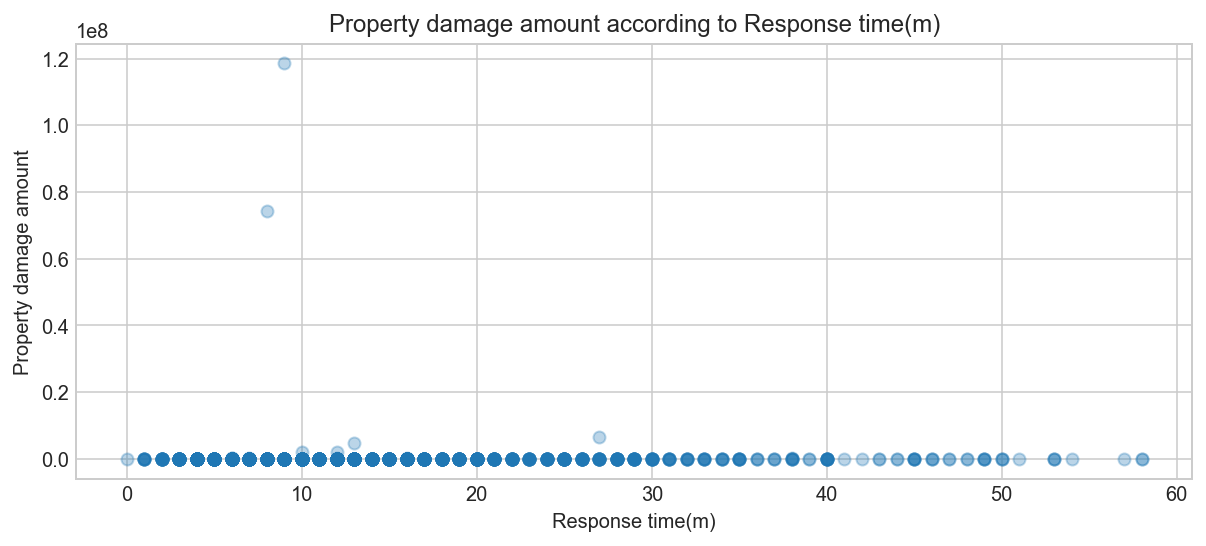

In [12]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.set_title("Property damage amount according to Response time(m)")
ax.set_xlabel('Response time(m)')
ax.set_ylabel('Property damage amount')
ax.scatter(df['출동소요시간(분)'], df['재산피해금액'], alpha=0.3)
plt.show()

## 출동시간에 따른 인명피해수

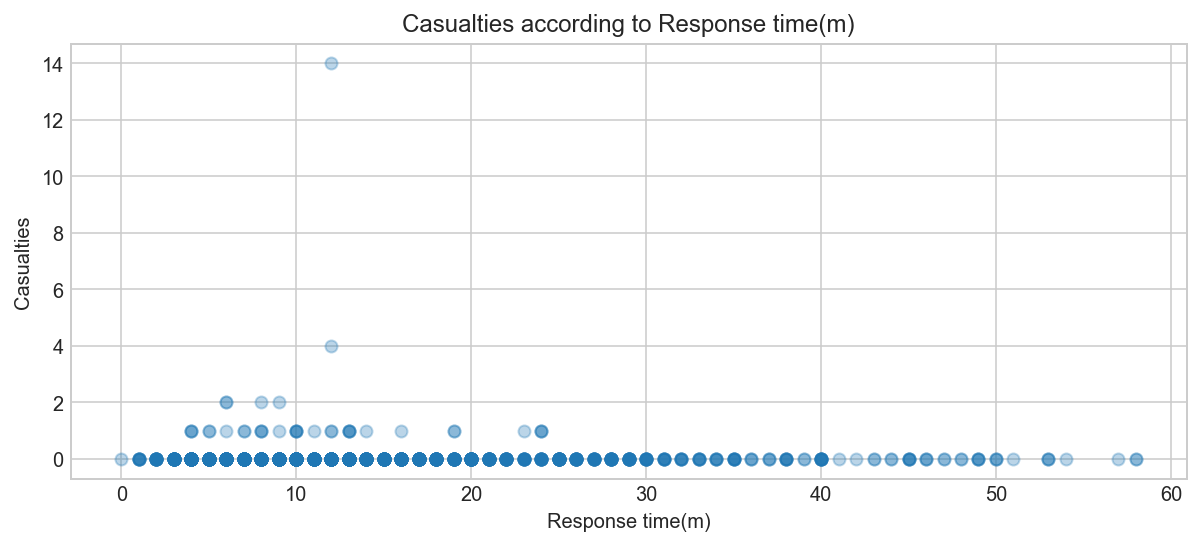

In [13]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.set_title("Casualties according to Response time(m)")
ax.set_xlabel('Response time(m)')
ax.set_ylabel('Casualties')
ax.scatter(df['출동소요시간(분)'], df['인명피해수'], alpha=0.3)
plt.show()

# 발화지점에 따른 피해 확인 

In [14]:
df['발화지점'].unique()

array(['산정상', '산아래', '산중턱', '평지', '미상'], dtype=object)

In [15]:
point = df['발화지점'].unique()
point

array(['산정상', '산아래', '산중턱', '평지', '미상'], dtype=object)

In [16]:
point_en = ['top', 'down', 'mid', 'plain', 'none']

In [17]:
damage = []
for p in point:
    print(len(df[df['발화지점']==p]['화재진압시간(분)']))
    damage.append(df[df['발화지점']==p]['화재진압시간(분)'].sum())
damage

212
418
326
83
14


[33190, 44102, 43938, 5966, 4998]

## 발화지점에 따른 화재진압시간(피해규모)

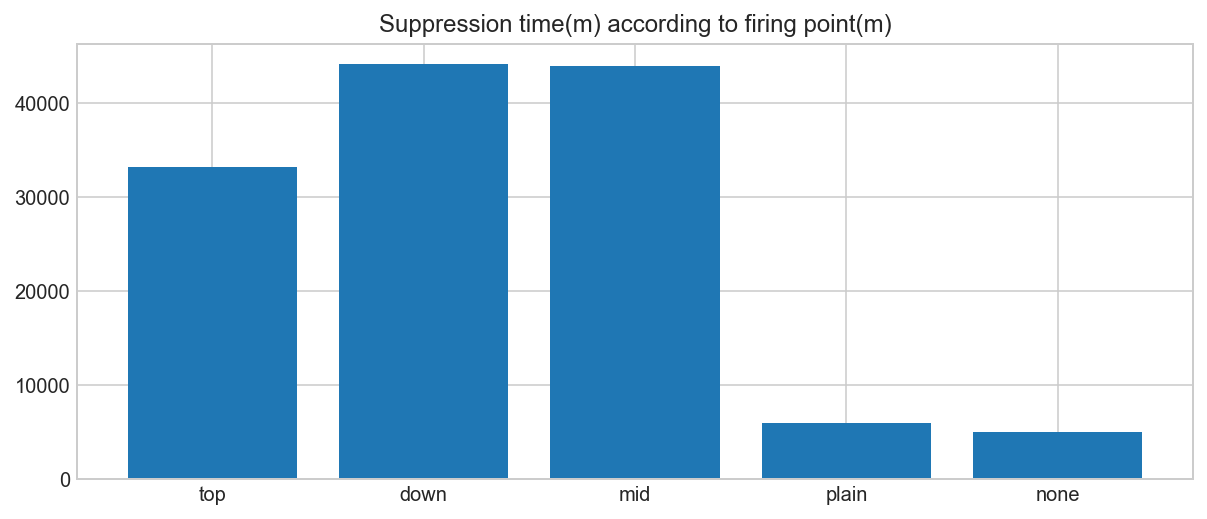

In [18]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.set_title("Suppression time(m) according to firing point(m)")
ax.bar(point_en, damage)
plt.show()

데이터가 정상, 아래, 중턱이 평지, 미상에 비해 많아서 그럴 확률이 높음 (데이터의 불균형) <br>
따라서 발화지점이 정확히 영향을 미치는지는 확실하지 않다,,

## 발화지점에 따른 인명피해수

In [19]:
damage = []
for p in point:
    damage.append(df[df['발화지점']==p]['인명피해수'].sum())
damage

[1, 30, 12, 13, 1]

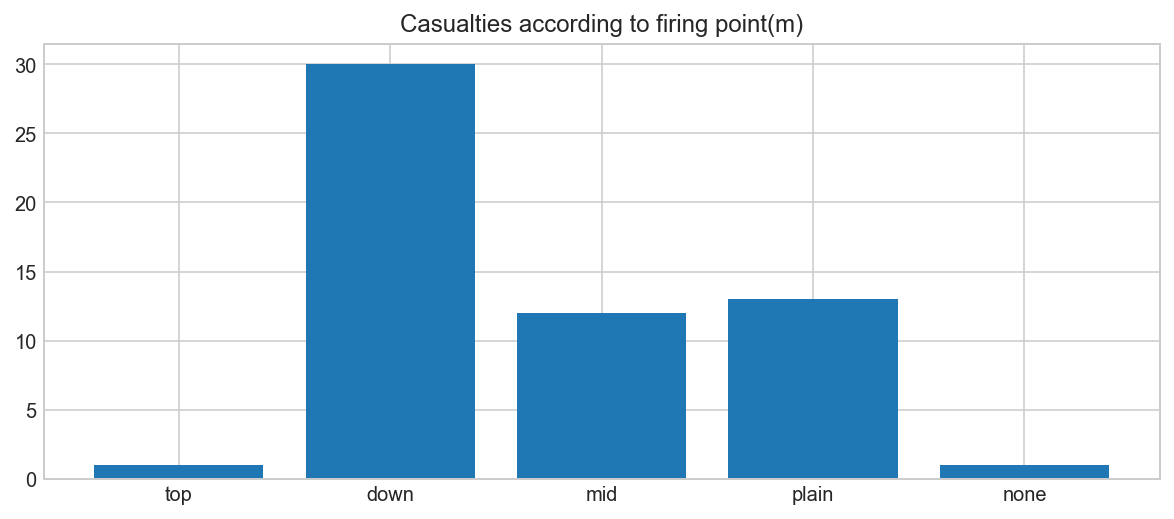

In [20]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.set_title("Casualties according to firing point(m)")
ax.bar(point_en, damage)
plt.show()

## 발화지점에 따른 재산피해금액

In [21]:
damage = []
for p in point:
    damage.append(df[df['발화지점']==p]['재산피해금액'].sum())
damage

[6940960, 3378191, 76611887, 123383591, 300252]

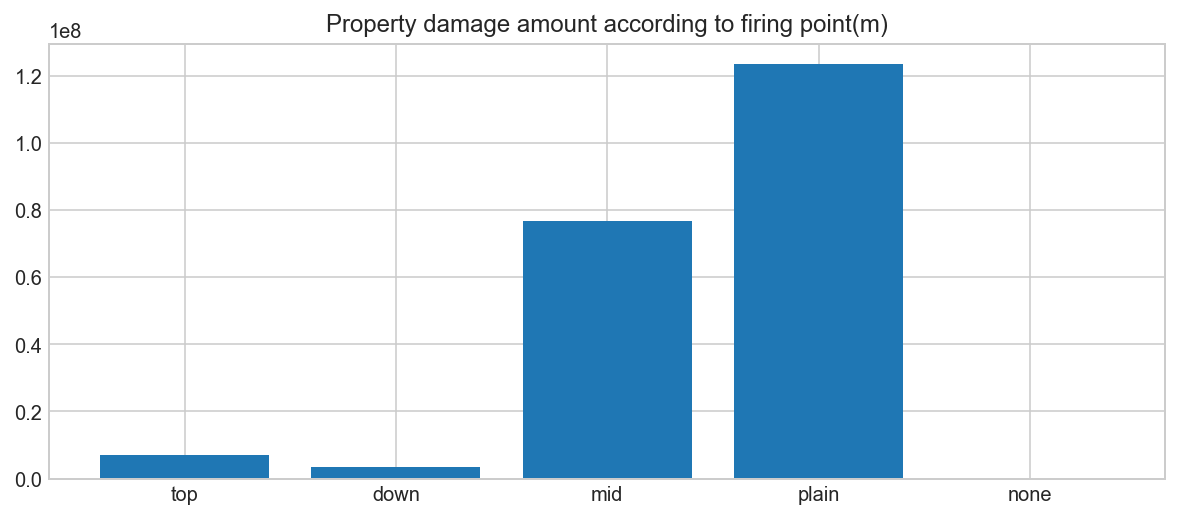

In [22]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.set_title("Property damage amount according to firing point(m)")
ax.bar(point_en, damage)
plt.show()

# 산불이 많이 발생했던 지역 보기

In [23]:
location = df['시군구명'].unique()
location

array(['강릉시', '양양군', '홍천군', '원주시', '영월군', '횡성군', '화천군', '정선군', '춘천시',
       '철원군', '양구군', '삼척시', '인제군', '고성군', '속초시', '평창군', '동해시', '태백시'],
      dtype=object)

In [24]:
location_en = ['Gangneung', 'Yangyang', 'Hongcheon', 'Wonju', 'Yeongwol', 'Hoengseong', 'Hwacheon', 'Jeongseon', 
               'Chuncheon', 'Cheorwon' ,'Yanggu', 'Samcheok', 'Inje', 'Goseong', 'Sokcho', 'Pyeongchang' 
               ,'Donghae', 'Taebaek']
len(location_en)

18

In [25]:
cnt = []
for loc in location:
    cnt.append(len(df[df['시군구명']==loc]))
cnt

[93, 41, 134, 84, 49, 70, 69, 45, 124, 64, 54, 48, 52, 49, 12, 46, 11, 8]

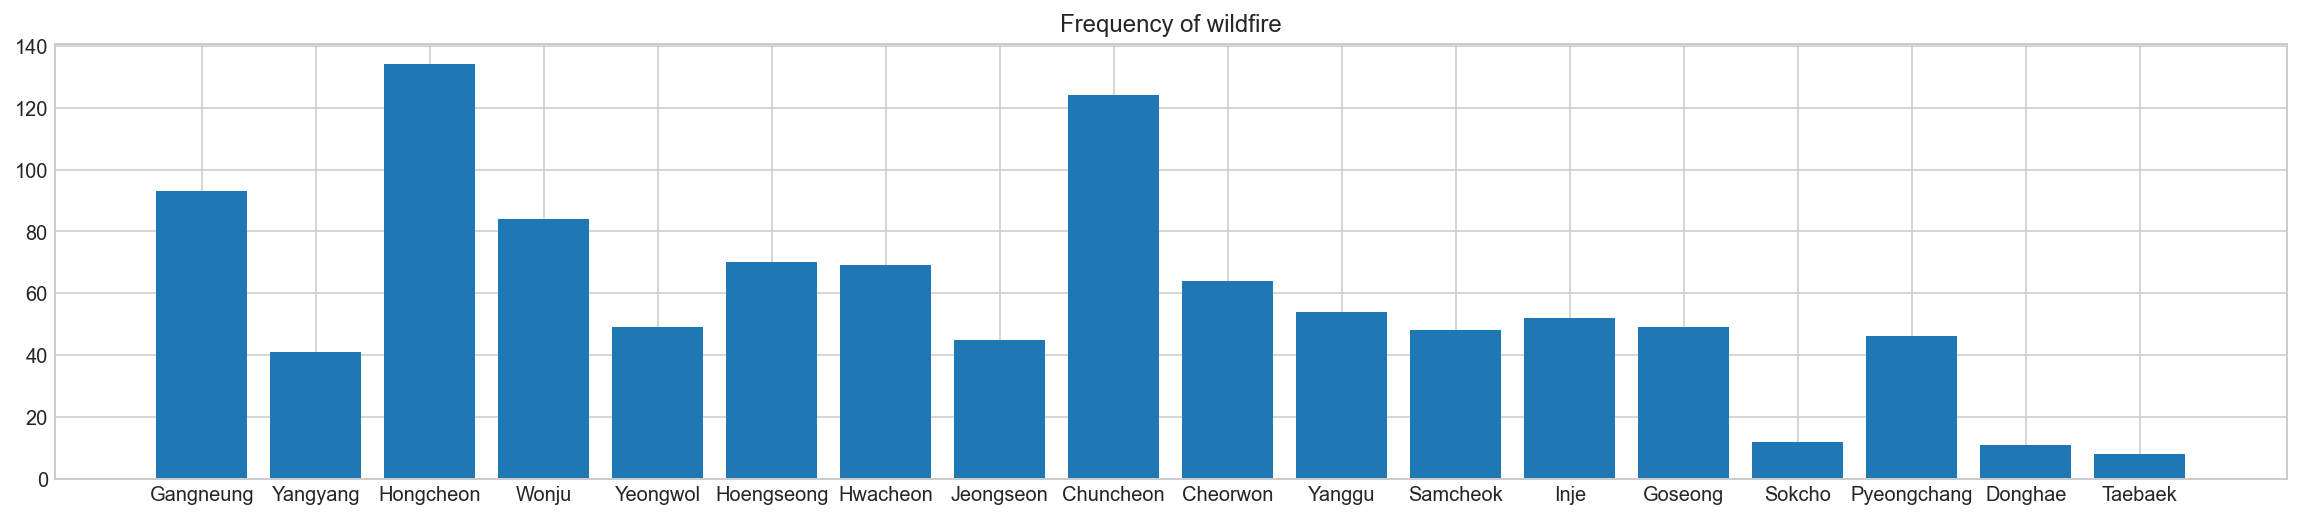

In [26]:
fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot(111)
ax.set_title("Frequency of wildfire")
ax.bar(location_en, cnt)
plt.show()

지난 10년간, <br>
홍천, 춘천, 강릉에서 산불이 가장 많이 발생한 것을 확인할 수 있음 <br>
태백, 속초에서 산불이 가장 적게 발생함 

## 지난 10년간 각 지역의 재산 및 인명 피해 규모

In [27]:
damage_m = []
damage_p = []
for loc in location:
    damage_m.append(df[df['시군구명']==loc]['재산피해금액'].sum())
    damage_p.append(df[df['시군구명']==loc]['인명피해수'].sum())

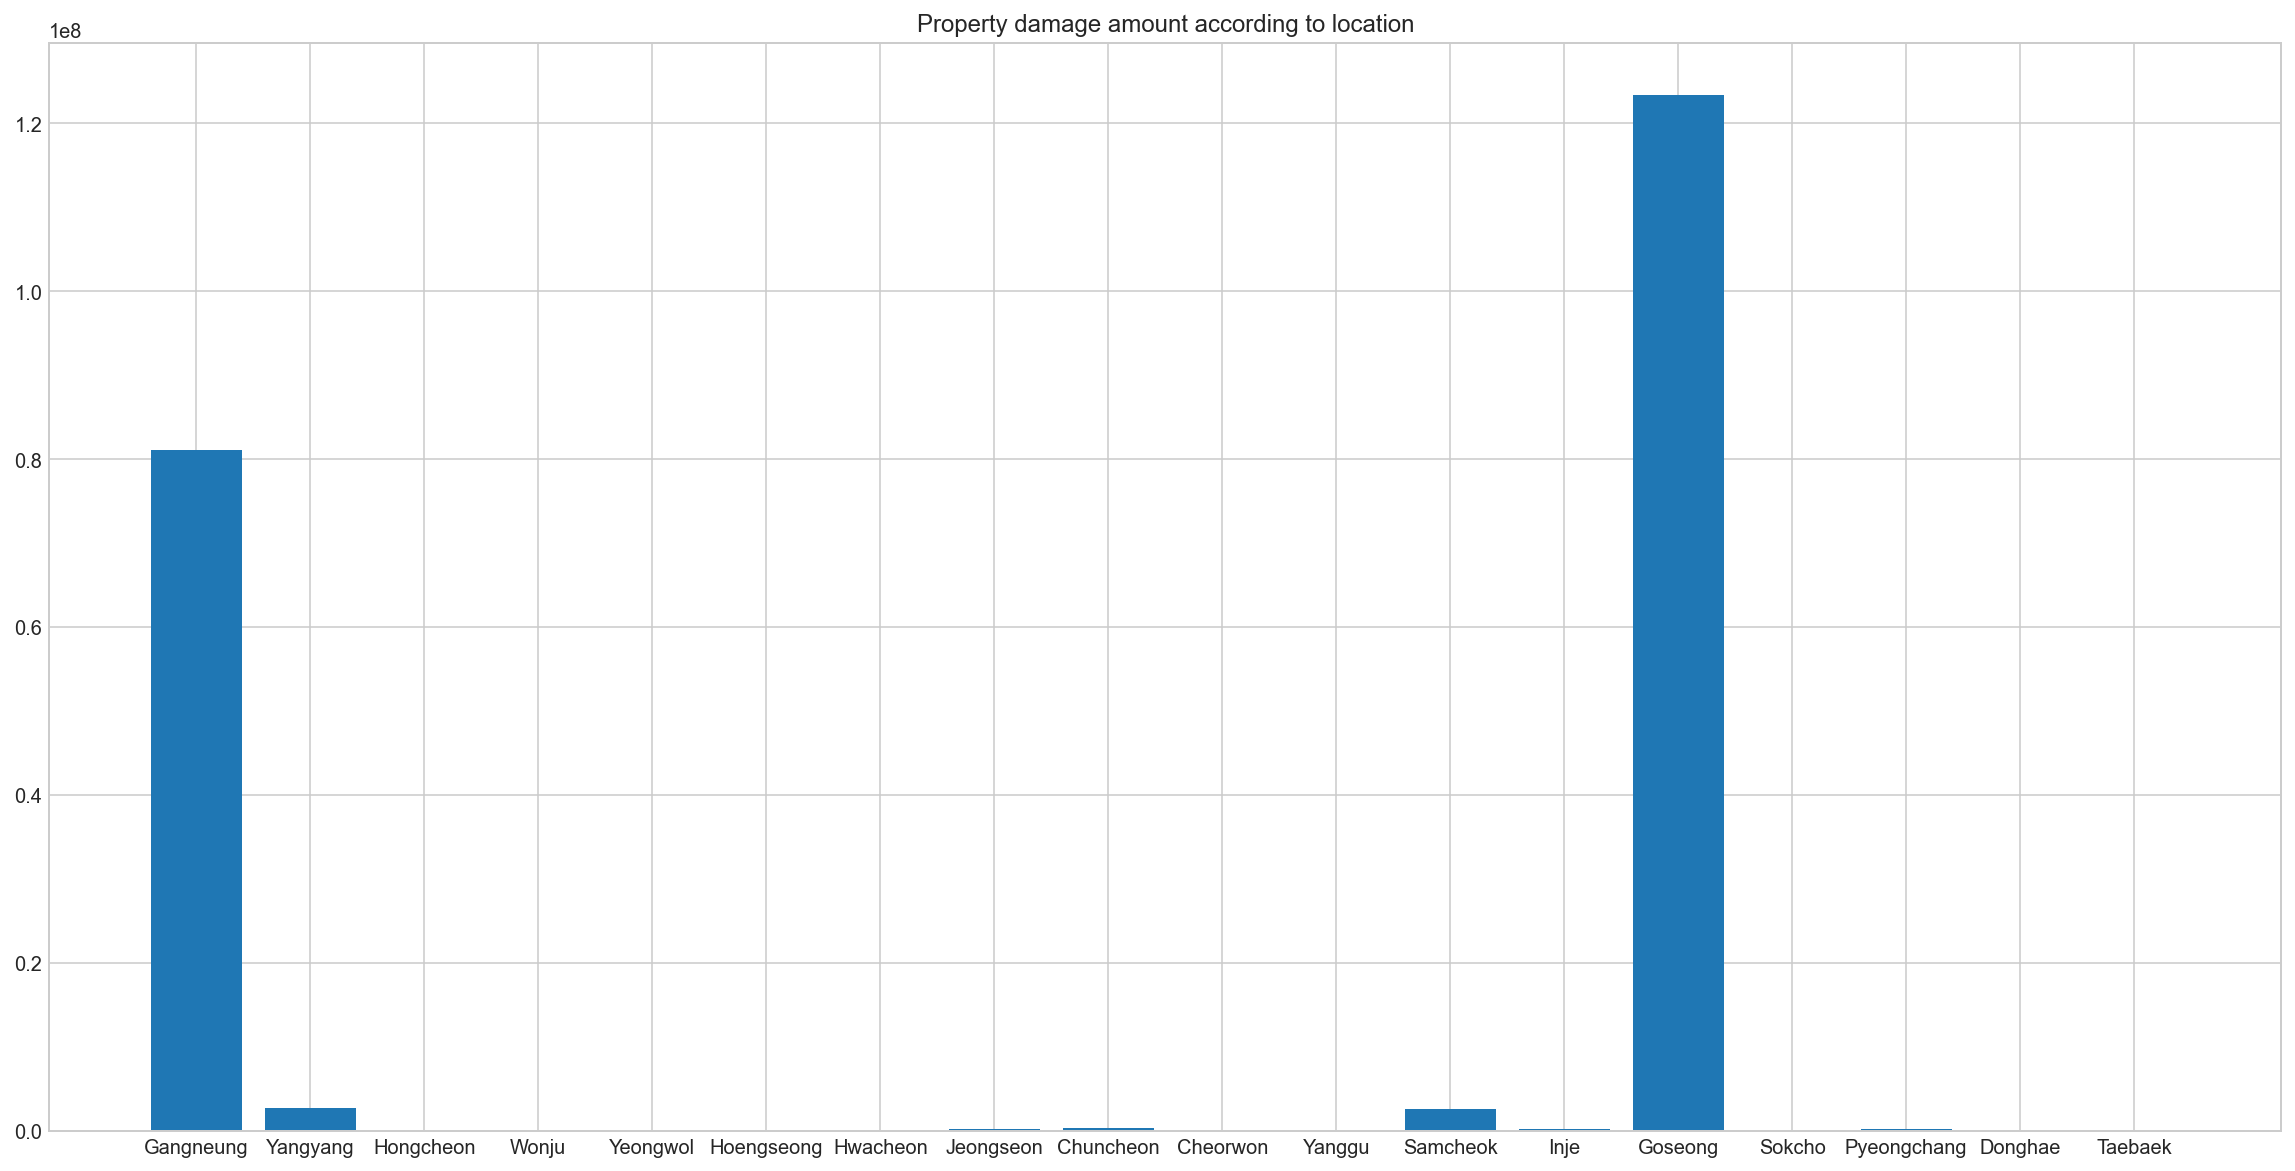

In [28]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set_title("Property damage amount according to location")
ax.bar(location_en, damage_m)
plt.show()

지난 10년간, 산불로 가장 많은 재산피해가 발생한 강원도의 지역은 고성과 강릉임을 확인할 수 있다. 

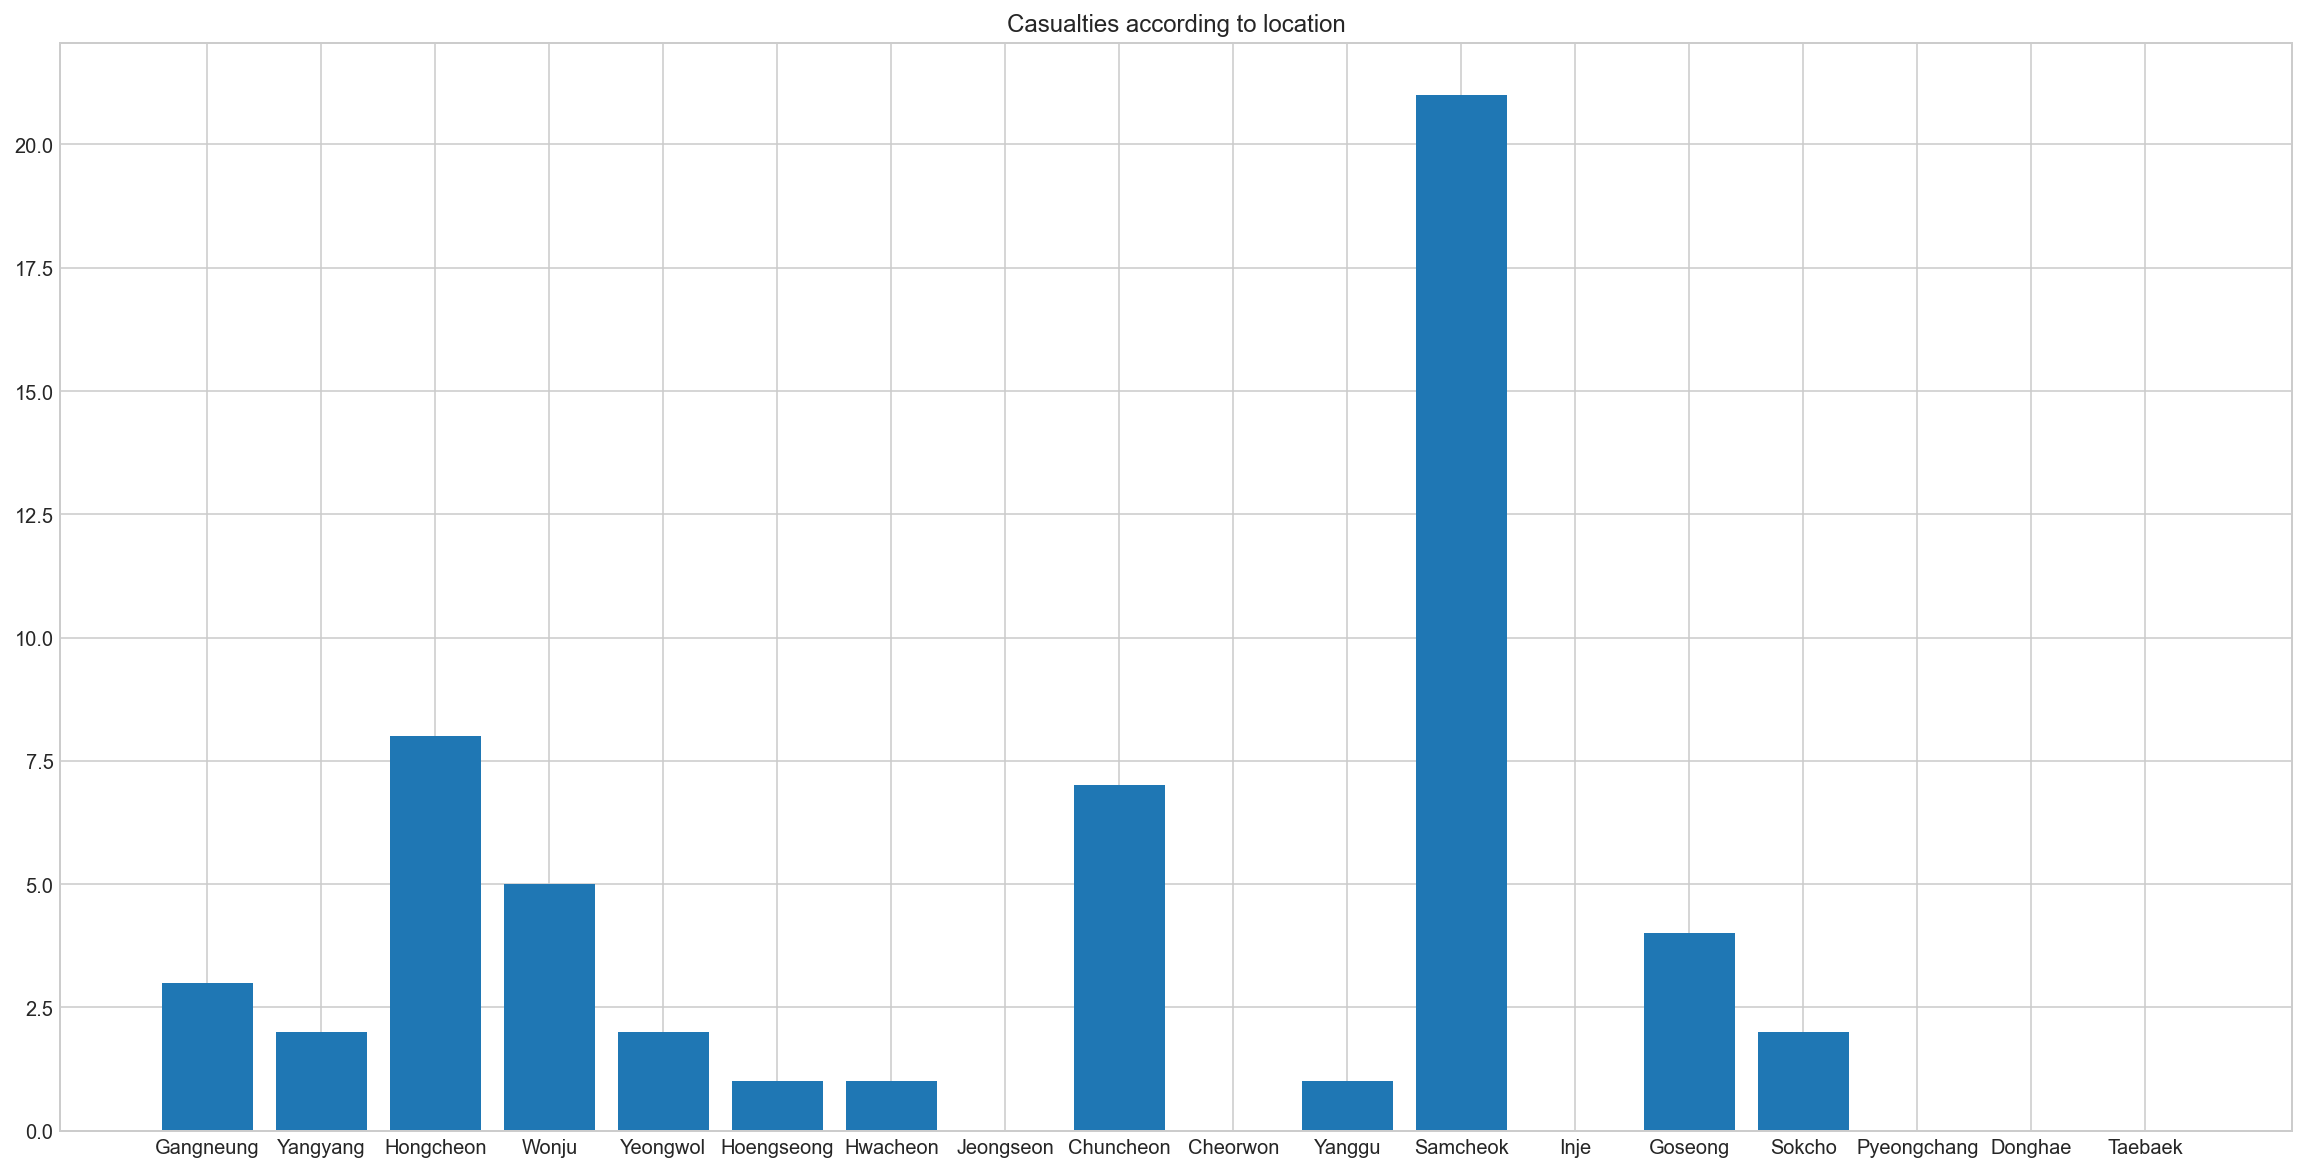

In [29]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set_title("Casualties according to location")
ax.bar(location_en, damage_p)
plt.show()

지난 10년간 인명피해가 매우 많지는 않았지만, 삼척시에서 가장 많은 인명피해가 발생한 것을 확인할 수 있다.

# 전체인력수합계에 따른 재산 피해금액

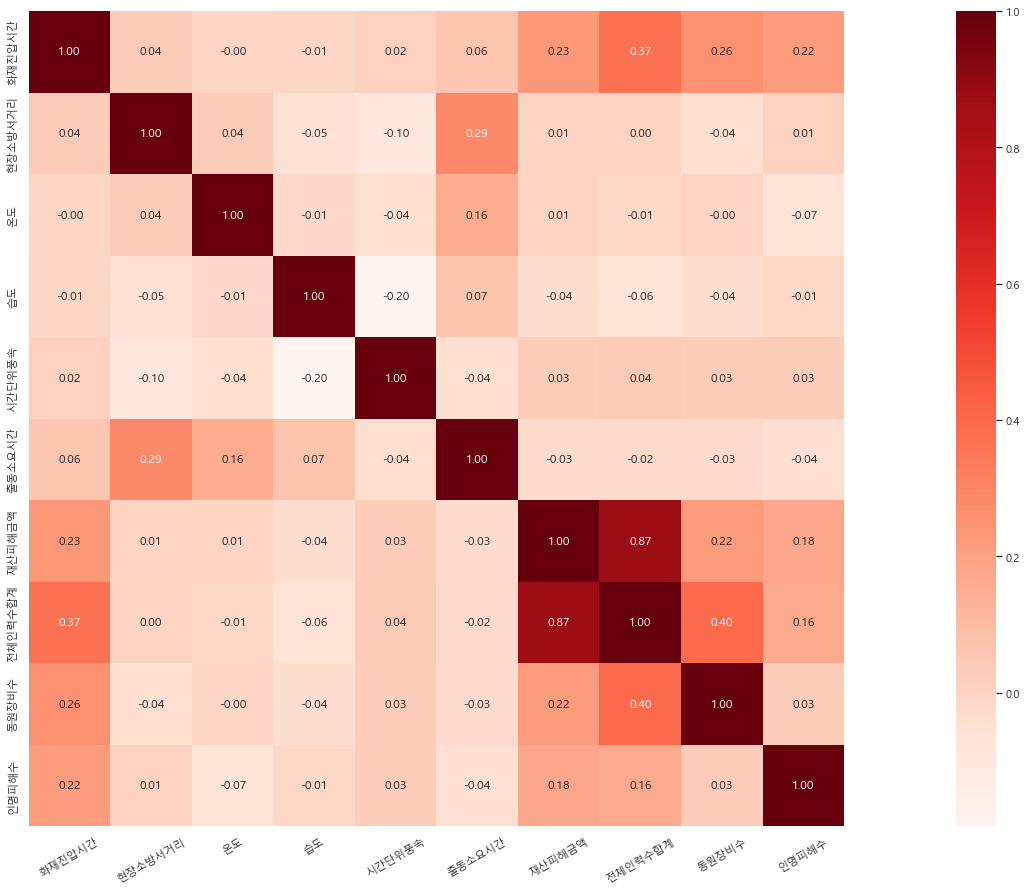

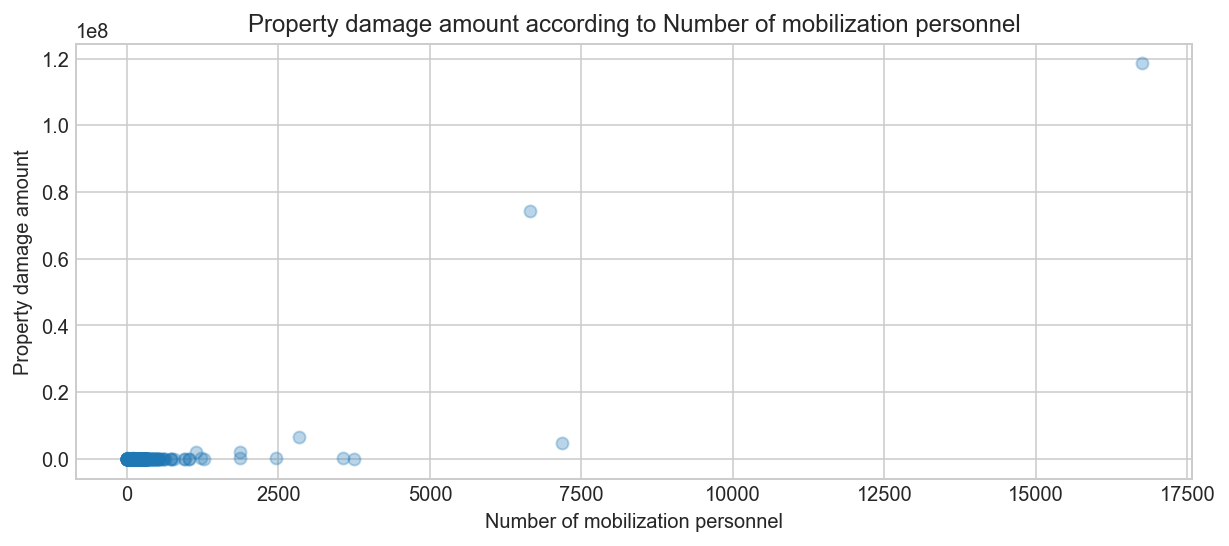

In [31]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.set_title("Property damage amount according to Number of mobilization personnel")
ax.set_xlabel('Number of mobilization personnel')
ax.set_ylabel('Property damage amount')
ax.scatter(df['전체인력수합계'], df['재산피해금액'], alpha=0.3)
plt.show()